<a href="https://colab.research.google.com/github/Faysoula/AI-Class-Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Continuing from the Midterm notebook, this notebook will have a different approach. We will instead split the dataset 2 ways instead of 3 and try different optimizations.

We will use the some same methods from the Midterm and try new ones with our gained knowledge. This notebook will also explore PCA, different hypertuning techniques, and more visualization to understand the dataset more.

# Preprocessing

Rerading in the dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data.csv")

df.head()

id diagnosis  radius  texture  perimeter    area  smoothness  \
0    842302         M   17.99    10.38     122.80  1001.0     0.11840   
1    842517         M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301         M   11.42    20.38      77.58   386.1     0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0     0.10030   

   compactness  concavity  concave points  ...  Worst radius  Worst texture  \
0      0.27760     0.3001         0.14710  ...         25.38          17.33   
1      0.07864     0.0869         0.07017  ...         24.99          23.41   
2      0.15990     0.1974         0.12790  ...         23.57          25.53   
3      0.28390     0.2414         0.10520  ...         14.91          26.50   
4      0.13280     0.1980         0.10430  ...         22.54          16.67   

   Worst perimeter  Worst area  Worst smoothness  Worst compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   Worst concavity  Worst concave points  Worst symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 32 columns]

### Understanding the dataset

In [ ]:
print(f"Number of rows: {len(df)} | Number of columns: {len(df.iloc[0])}")

Number of rows: 569 | Number of columns: 32


In [ ]:
benign_count = (df['diagnosis'] == 'B').sum()
malignant_count = (df['diagnosis'] == 'M').sum()
print(f"Number of benign: {benign_count} | Number of Malignant: {malignant_count}\n\nRatio: {benign_count/ malignant_count:.2f}")

Number of benign: 357 | Number of Malignant: 212

Ratio: 1.68


Removing the ID column and extra comuln since they proide no extra information.

In [ ]:
df = df.drop("id", axis="columns")
# df = df.drop("Unnamed: 32", axis="columns")
df.head()

diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0         M   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1         M   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2         M   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3         M   11.42    20.38      77.58   386.1     0.14250      0.28390   
4         M   20.29    14.34     135.10  1297.0     0.10030      0.13280   

   concavity  concave points  symmetry  ...  Worst radius  Worst texture  \
0     0.3001         0.14710    0.2419  ...         25.38          17.33   
1     0.0869         0.07017    0.1812  ...         24.99          23.41   
2     0.1974         0.12790    0.2069  ...         23.57          25.53   
3     0.2414         0.10520    0.2597  ...         14.91          26.50   
4     0.1980         0.10430    0.1809  ...         22.54          16.67   

   Worst perimeter  Worst area  Worst smoothness  Worst compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   Worst concavity  Worst concave points  Worst symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

## Find the correlations

In [ ]:
import numpy as np

def find_correlation(df, X_name, Y_name):
  X = df[X_name]
  Y = df[Y_name]
  X = X.to_numpy()
  Y = Y.to_numpy()
  return np.corrcoef(X, Y)[0, 1]

In [ ]:
def find_all_correlations(df):

  columns = df.columns[1:] # get all the columns except the diagnosis

  correlations = np.ndarray(shape = (len(columns), len(columns)), dtype=float)

  for i in range(len(columns)):
    for j in range(len(columns)):
      correlations[i][j] = find_correlation(df, columns[i], columns[j])

  return correlations

In [ ]:
all_correlations = find_all_correlations(df)

Plot the correlation matrix.

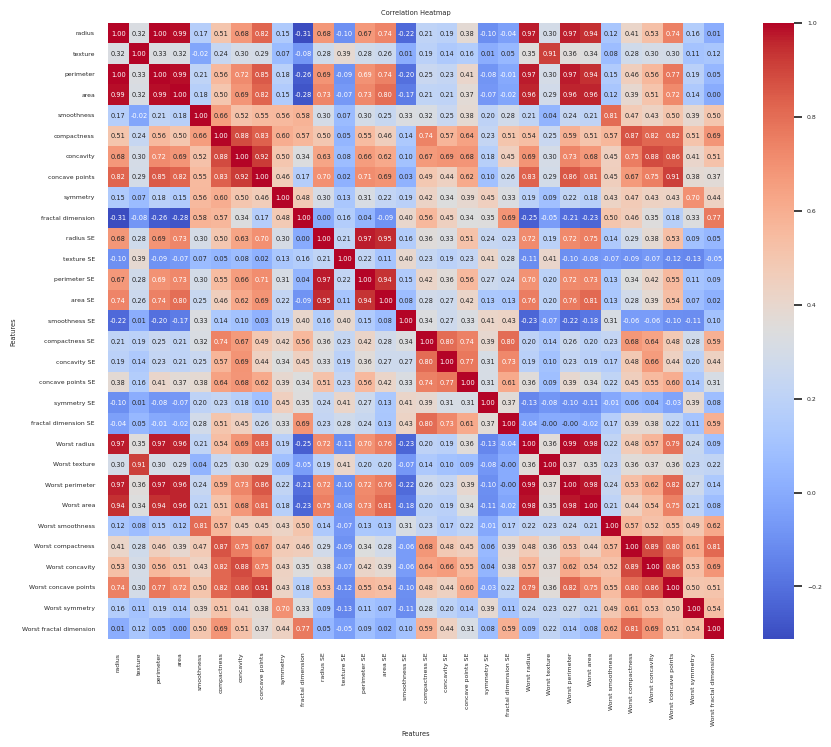

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def draw_heatmap(df, all_correlations):

  # Set the figure size
  plt.figure(figsize=(10, 8))  # Adjust the width (10) and height (8) as needed

  columns_names = df.columns[1:]

  # Create a heatmap using Seaborn
  sns.set(font_scale=0.4)  # Adjust font size if needed
  sns.heatmap(all_correlations, annot=True, cmap='coolwarm', fmt='.2f', square=True, xticklabels=columns_names, yticklabels=columns_names)

  # Add labels and title
  plt.xlabel('Features')
  plt.ylabel('Features')
  plt.title('Correlation Heatmap')

  # Show the plot
  plt.show()

draw_heatmap(df, all_correlations)

# Preparing the dataset

First we seperate the input and output

In [ ]:
X_df = df.drop(columns = "diagnosis")

y_df = df["diagnosis"]

X_df.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  ...  Worst radius  \
0         0.14710    0.2419            0.07871  ...         25.38   
1         0.07017    0.1812            0.05667  ...         24.99   
2         0.12790    0.2069            0.05999  ...         23.57   
3         0.10520    0.2597            0.09744  ...         14.91   
4         0.10430    0.1809            0.05883  ...         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

## Performing PCA on the dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = X_df.values
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=5)  # for example, reduce to 5 components
principalComponents = pca.fit_transform(X_scaled)

In [ ]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


In [ ]:
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

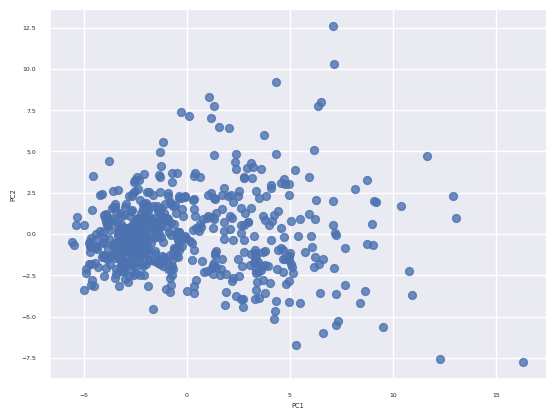

In [ ]:
principalDf.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

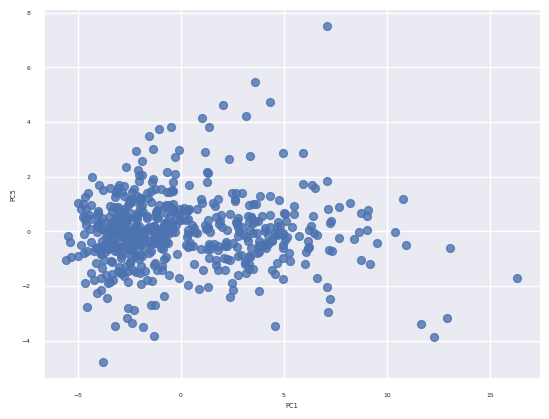

In [ ]:
principalDf.plot(kind='scatter', x='PC1', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

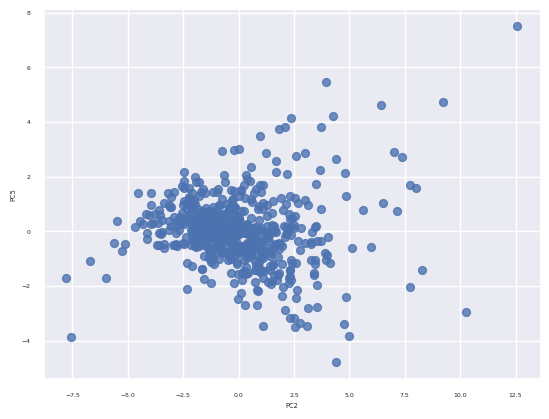

In [ ]:
principalDf.plot(kind='scatter', x='PC2', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

After using PCA on the dataset, we determined that there are 2 datapoints that contribute to more than 60% of the information used to determine the diagnosis. We also noticed that the top compenents are correlated which matches our correlation matrix and adds proof to it.

The pca and principleComponents variables will be used later to train models with the 5 most important principle components.

## Split the dataset into training and testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns="diagnosis")
y = df["diagnosis"]
y = np.array(y == 'M')

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to NumPy arrays
X_train = X_train.values
X_test = X_test.values

# Display the sizes of the sets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 455
Test set size: 114


The train and test datasets will be used for the next section to train 3 different models.

# Building The Models

Let's first create a function to show the different accuracy metrics of the model.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

def show_accuracy(model, X_test, y_test, fn=accuracy_score):
  # Use the trained classifier to make predictions on the validation set
  y_pred = model.predict(X_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Generate a classification report
  class_report = classification_report(y_test, y_pred)
  print("Classification Report:\n", class_report)

  # Create a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Display the confusion matrix
  cf_display = ConfusionMatrixDisplay(conf_matrix)
  cf_display.plot()

## Random Forest

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



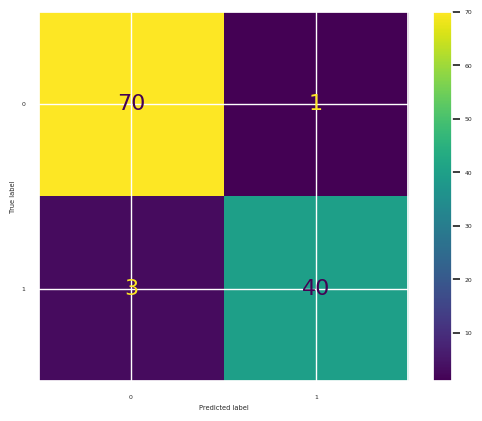

In [ ]:
from sklearn.ensemble import RandomForestClassifier
plt.rcParams.update({'font.size': 16})

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

show_accuracy(rf, X_test, y_test)

Visualizing a descision tree from the Random Forest

In [ ]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X_df.columns.values,
                class_names = y_df.name,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

After training the random forest model with default parameters on the training set, we achieved an accuracy of 96.49%.

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



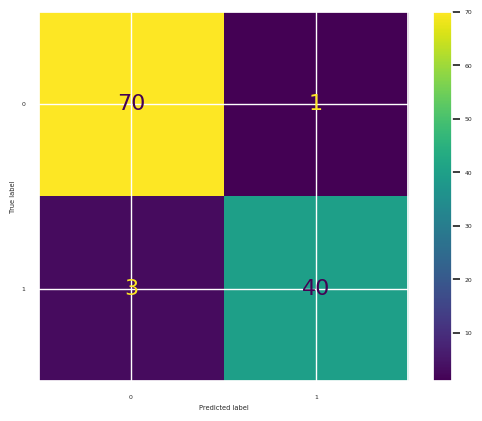

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

show_accuracy(lr, X_test, y_test)

After training the logistic regression model with default parameters on the training set, we achieved an accuracy of 96.49% similar to the random forest model.

## Support Vector Machine

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96        71
        True       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



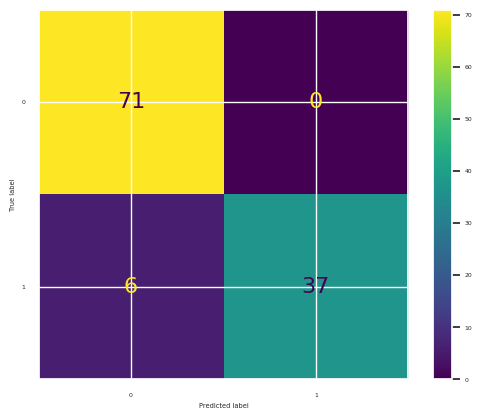

In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)

show_accuracy(sv, X_test, y_test)

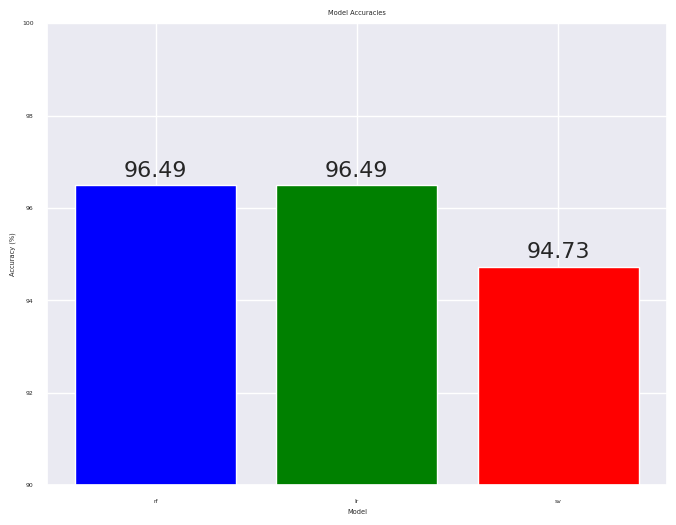

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracies(model_accs):

  models = list(model_accs.keys())
  accuracies = list(model_accs.values())

  # Create the histogram
  plt.figure(figsize=(8, 6))
  plt.bar(models, accuracies, color=['blue', 'green', 'red'])

  # Set the range for y-axis
  plt.ylim(90, 100)

  # Set the labels and title
  plt.ylabel('Accuracy (%)')
  plt.xlabel('Model')
  plt.title('Model Accuracies')

  # Display the values on top of the bars
  for i, v in enumerate(accuracies):
      plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

  # Show the plot
  plt.show()

# Data: model names and their corresponding accuracies
model_accs = {"rf": 96.49, "lr": 96.49, "sv": 94.73}

plot_accuracies(model_accs)

After training the support vector machine model with default parameters on the training set, we achieved an accuracy of 94.73% which is lower than the previous models.

# Using the PCA on the base Models

## Splitting the PCA into training and testing

First we will show a sample of the y and principleComponents to remind ourselves of the pca data and output.

In [ ]:
print(y[-5:])
print(principalComponents[-5:])

[ True  True  True  True False]
[[ 6.43931548 -3.57681744  2.45948654  1.17731386 -0.07482494]
 [ 3.79338237 -3.58404786  2.08847648 -2.50602731 -0.51072181]
 [ 1.25617928 -1.90229671  0.56273061 -2.08922651  1.80999252]
 [10.37479406  1.6720101  -1.87702932 -2.35603117 -0.03374159]
 [-5.4752433  -0.67063679  1.49044269 -2.29915943 -0.18470784]]


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents, y, test_size=0.2, random_state=42)

# Display the sizes of the sets
print("Training set size:", X_train_pca.shape[0])
print("Test set size:", X_test_pca.shape[0])

Training set size: 455
Test set size: 114


## PCA with Random Forest

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96        71
        True       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



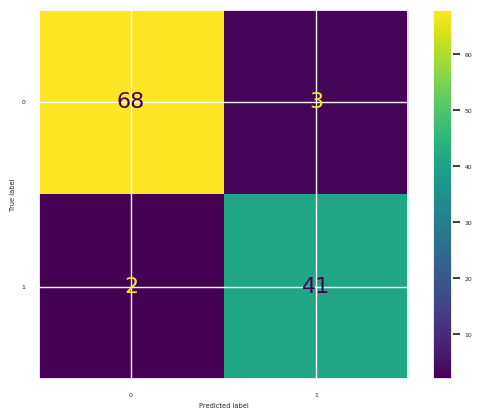

In [ ]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train_pca)

show_accuracy(rf_pca, X_test_pca, y_test_pca)

## PCA with Logistic Regression

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99        71
        True       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



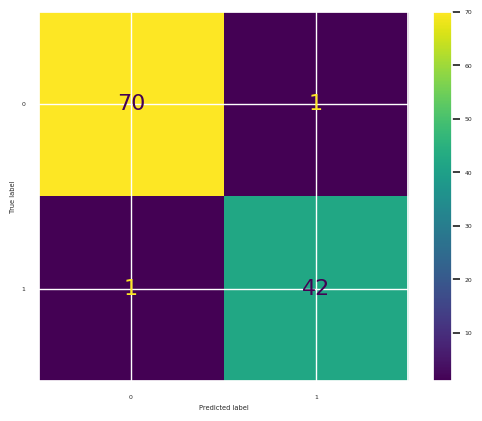

In [ ]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train_pca)

show_accuracy(lr_pca, X_test_pca, y_test_pca)

## PCA with Support Vector Machine

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97        71
        True       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



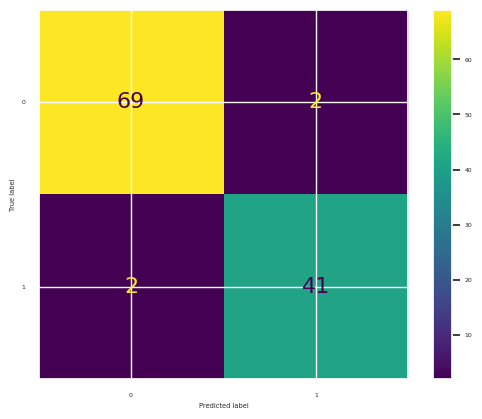

In [ ]:
sv_pca = SVC()
sv_pca.fit(X_train_pca, y_train_pca)

show_accuracy(sv_pca, X_test_pca, y_test_pca)

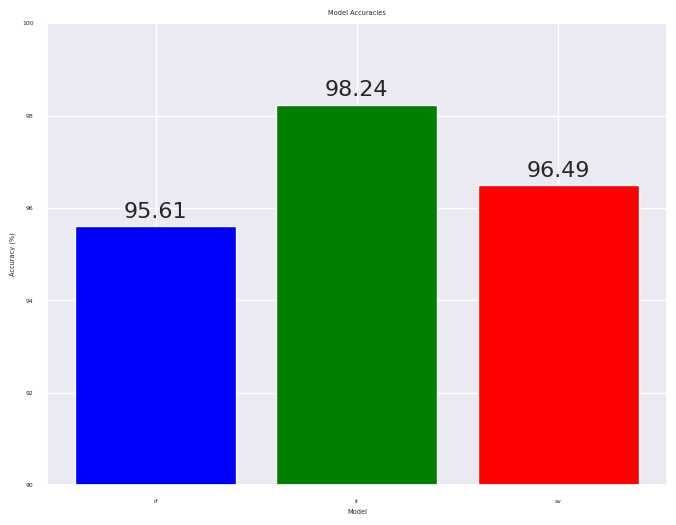

In [ ]:
model_accs = {"rf": 95.61, "lr": 98.24, "sv": 96.49}

plot_accuracies(model_accs)

## PCA Conclusion

The PCA decreased the accuracy for the random forest model but it increased the accuracy for the logistic regression and support vector machine model.

The logistic regression model with the PCA is now the highest performing model, and SVM with PCA is now as performant as the other models were without PCA.

The reason for this observation is that random forest models are perfectly capable of handling high dimensional input, and when we used PCA, we lowered the dimensionality and this in turn redcued the information that the random forest model could use to make an accurate output.

On the other hand, for the logistic regression and SVM models, they are not very capable of handling high dimensional inputs since they are linear. So when we used PCA we decreased the dimensions and this in turn would help out these linear models perform more accuracte predictions.


# L1 and L2 Regularization

After finding out the most optimal parameters for our models, and given that they are more performant on the base dataset rather than PCA. We will perform L1 and L2 regualarization and see if the accuracies vary.

### L1 Regularization

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Create a Lasso model for feature selection
lasso = Lasso(alpha=0.01)

# Create a feature selection model based on Lasso
feature_selector = SelectFromModel(lasso)

# Transform your data to select important features
X_l1 = feature_selector.fit_transform(X, y)

In [ ]:
# Split the data into training and test sets
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X_l1, y, test_size=0.2, random_state=42)

# Display the sizes of the sets
print("Training set size:", X_train_l1.shape[0])
print("Test set size:", X_test_l1.shape[0])

Training set size: 455
Test set size: 114


### L2 Regularization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)

In [ ]:
# Split the data into training and test sets.
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X_l2, y, test_size=0.2, random_state=42)

# Display the sizes of the sets
print("Training set size:", X_train_l2.shape[0])
print("Test set size:", X_test_l2.shape[0])

Training set size: 455
Test set size: 114


# Hyper-parameter tuning the models

We will now hypertune the 2 best performing models which are the Random Forest and Logistic Regression models

## Random Forest

Use the random search for random forest and grid search and define the parameters to test.

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],           # Number of features to consider at every split
    'max_depth': [10, 20, 30, 40, 50, None],    # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}

Initialize 2 RandomizedSearchCV objects, one for the pca data and one for the base data.

In [ ]:
rf_random_base = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_pca = RandomizedSearchCV(estimator=rf_pca, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_l1 = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_l2 = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

#### Base Data

Use the RandomizedSearch CV on the base training set with Random Forest

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



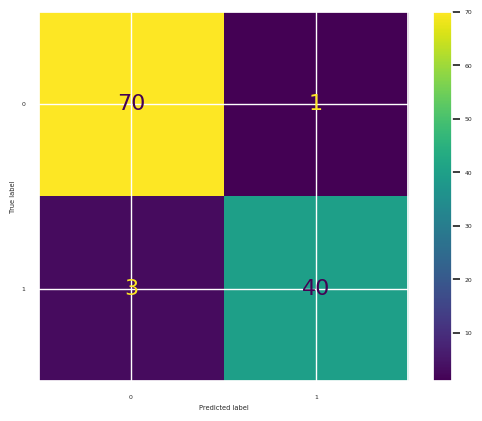

In [ ]:
rf_random_base.fit(X_train, y_train)

show_accuracy(rf_random_base, X_test, y_test)

#### PCA Data

Use the RandomizedSearch CV on the pca training set with Random Forest

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96        71
        True       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



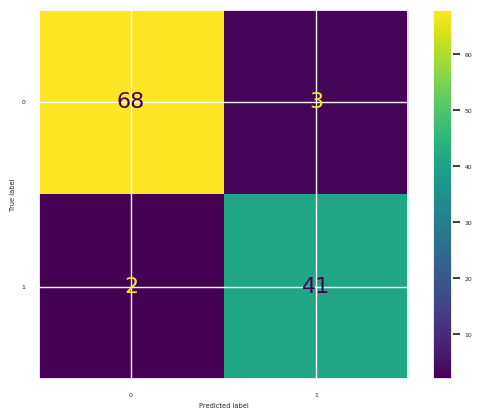

In [ ]:
rf_random_pca.fit(X_train_pca, y_train_pca)

show_accuracy(rf_random_pca, X_test_pca, y_test_pca)

#### L1 Data

Use the RandomizedSearch CV on the l1 training set with Random Forest

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98        71
        True       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



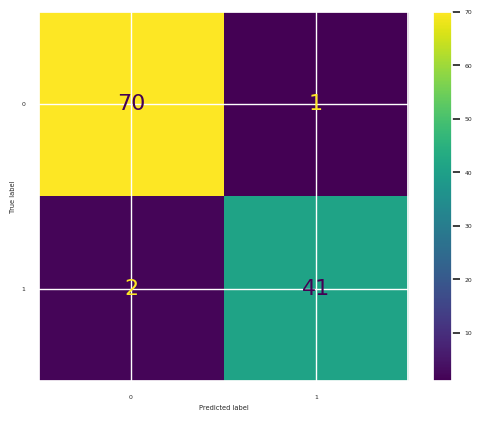

In [ ]:
rf_random_l1.fit(X_train_l1, y_train_l1)

show_accuracy(rf_random_l1, X_test_l1, y_test_l1)

#### L2 Data

Use the RandomizedSearch CV on the l2 training set with Random Forest

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



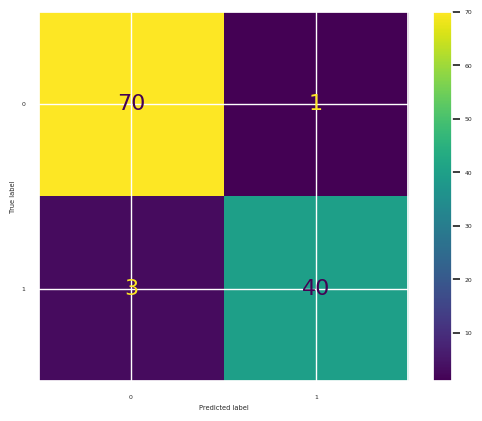

In [ ]:
rf_random_l2.fit(X_train_l2, y_train_l2)

show_accuracy(rf_random_l2, X_test_l2, y_test_l2)

In [ ]:
print("Base Data rf random search best:", rf_random_base.best_params_, end="\n\n")
print("PCA Data rf random search best:", rf_random_pca.best_params_, end = "\n\n")
print("L1 Data rf random search best:", rf_random_l1.best_params_, end="\n\n")
print("L2 Data rf random search best:", rf_random_l2.best_params_, end = "\n\n")

Base Data rf random search best: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

PCA Data rf random search best: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}

L1 Data rf random search best: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

L2 Data rf random search best: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}



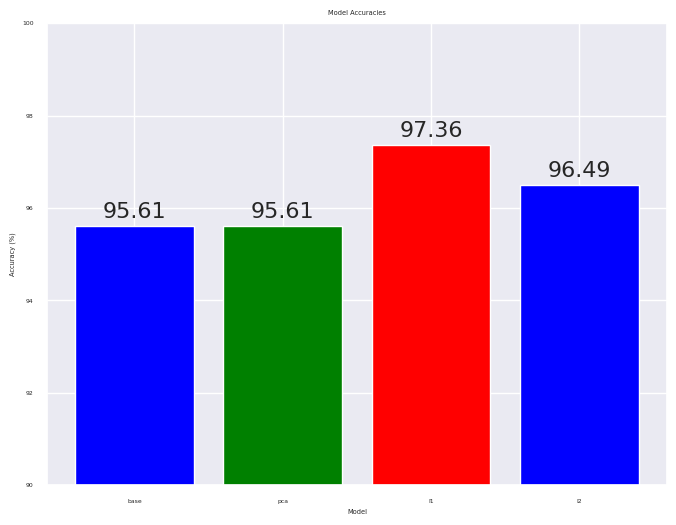

In [ ]:
model_accs = {"base": 95.61, "pca": 95.61, "l1": 97.36, "l2": 96.49}

plot_accuracies(model_accs)

The accuracy of on the base data decreased after hyperparameter tuning, it also decreased for the PCA data but increased for L1 and L2 regularization

### Grid Search

Define the parameters for grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search_rf_base = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf_pca = GridSearchCV(estimator=rf_pca, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf_l1 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf_l2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#### Base Data

Use the GridSearchCV on the base training set with Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       286
        True       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



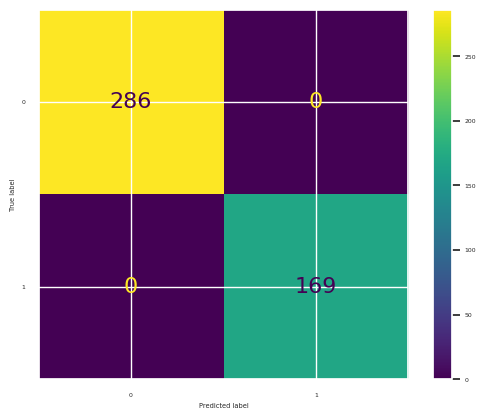

In [ ]:
grid_search_rf_base.fit(X_train, y_train)

show_accuracy(grid_search_rf_base, X_train, y_train)

#### PCA Data

Use the GridSearchCV on the pca training set with Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96        71
        True       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



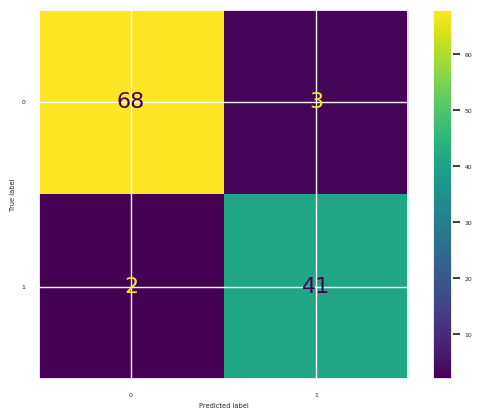

In [ ]:
grid_search_rf_pca.fit(X_train_pca, y_train_pca)

show_accuracy(grid_search_rf_pca, X_test_pca, y_test_pca)

#### L1 Data

Use the GridSearchCV on the l1 training set with Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98        71
        True       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



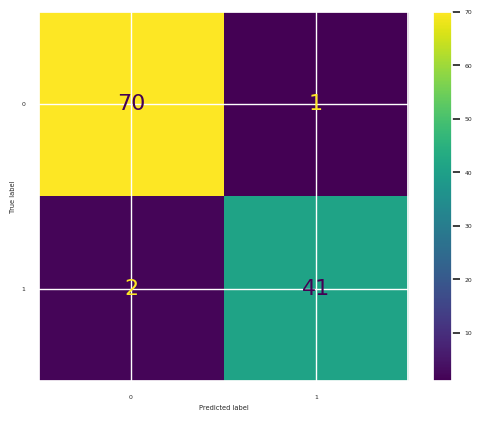

In [ ]:
grid_search_rf_l1.fit(X_train_l1, y_train_l1)

show_accuracy(grid_search_rf_l1, X_test_l1, y_test_l1)

#### L2 Data

Use the GridSearchCV on the l2 training set with Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



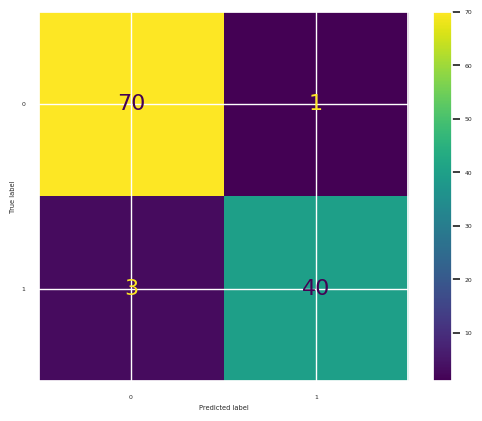

In [ ]:
grid_search_rf_l2.fit(X_train_l2, y_train_l2)

show_accuracy(grid_search_rf_l2, X_test_l2, y_test_l2)

In [ ]:
print("Base Data rf grid search best:", grid_search_rf_base.best_params_, end="\n\n")
print("PCA Data rf grid search best:", grid_search_rf_pca.best_params_, end = "\n\n")
print("L1 Data rf grid search best:", grid_search_rf_l1.best_params_, end="\n\n")
print("L2 Data rf grid search best:", grid_search_rf_l2.best_params_, end = "\n\n")

Base Data rf grid search best: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

PCA Data rf grid search best: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

L1 Data rf grid search best: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

L2 Data rf grid search best: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



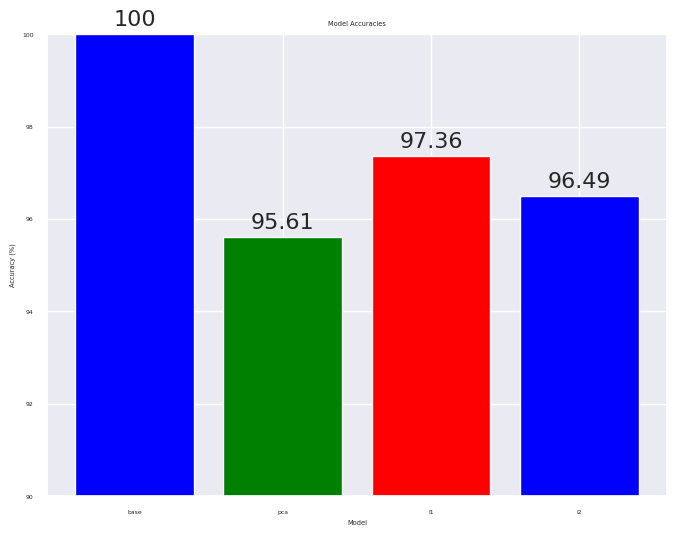

In [ ]:
model_accs = {"base": 100, "pca": 95.61, "l1": 97.36, "l2": 96.49}

plot_accuracies(model_accs)

The Grid Search for random forest with the base dataset was able to find parameters that led to an accuracy of 100% on the base testing data. This model is now the best performing one.

The Grid Search for random forest with the PCA dataset decreased but the L1 and L2 data increased.

## Logistic Regression

Since the Logistic Regression Model doesn't have much parameters that could be manipulated, we will use a manual search to try an find an optimal parameter. And then we will use grid search to see if it can find other optimal parameters.

### Manual Search

First we need to create a function that takes in a dataset and returns the best and worst accuracy from an array of Logistic Regression Models

In [ ]:
def find_best_worst(clf, X_train, y_train, X_test, y_test):

  model_accuracies = {"highest": (), "lowest": ()}
  highest_accuracy = 0
  lowest_accuracy = 1

  for lr in clf:

    lr.fit(X_train, y_train)

    # Get a prediction
    y_pred = lr.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > highest_accuracy:
        model_accuracies["highest"] = (lr, accuracy)
        highest_accuracy = accuracy

    if accuracy < lowest_accuracy:
        model_accuracies["lowest"] = (lr, accuracy)
        lowest_accuracy = accuracy

  return model_accuracies

In [ ]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='liblinear',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='newton-cg',penalty='none', C=0.001, max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',C=0.001, max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',C=0.001, max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',C=0.001, max_iter=1000),
]

#### Base Data

In [ ]:
base_accuracy_lf = find_best_worst(clf, X_train, y_train, X_test, y_test)

print("Lowest: ", base_accuracy_lf["lowest"])
print("Highest: ", base_accuracy_lf["highest"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packag

Lowest:  (LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='newton-cg'), 0.9473684210526315)
Highest:  (LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag'), 0.9736842105263158)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### PCA Data

In [ ]:
pca_accuracy_lf = find_best_worst(clf, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

print("Lowest: ", pca_accuracy_lf["lowest"])
print("Highest: ", pca_accuracy_lf["highest"])

Lowest:  (LogisticRegression(C=0.001, max_iter=1000, solver='newton-cg'), 0.8859649122807017)
Highest:  (LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='newton-cg'), 0.9824561403508771)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

#### L1 Data

In [ ]:
=l1_accuracy_lf = find_best_worst(clf, X_train_l1, y_train_l1, X_test_l1, y_test_l1)

print("Lowest: ", l1_accuracy_lf["lowest"])
print("Highest: ", l1_accuracy_lf["highest"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

Lowest:  (LogisticRegression(C=0.001, max_iter=1000, solver='saga'), 0.9385964912280702)
Highest:  (LogisticRegression(C=0.001, max_iter=1000, solver='newton-cg'), 0.9649122807017544)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### L2 Data

In [ ]:
l2_accuracy_lf = find_best_worst(clf, X_train_l2, y_train_l2, X_test_l2, y_test_l2)

print("Lowest: ", l2_accuracy_lf["lowest"])
print("Highest: ", l2_accuracy_lf["highest"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Lowest:  (LogisticRegression(C=0.001, max_iter=1000, solver='newton-cg'), 0.8859649122807017)
Highest:  (LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag'), 0.9736842105263158)


With manual search, the best parameters were C=0.001, max_iter=1000, penalty='none', solver='sag'. It increased the accuracy from 96.49% to 97.36% for the logistic regresssion base model.

And for the PCA dataset the parameters C=0.001, max_iter=1000, penalty='none', solver='newton-cg' increased the accuracy from 96.49% to 98.24%.

### Grid Search

In [ ]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l2'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithms
}

In [ ]:
grid_search_lr_base = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lr_pca = GridSearchCV(estimator=lr_pca, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lr_l1 = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lr_l2 = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#### Base Data

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Accuracy: 0.9846153846153847
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       286
        True       0.98      0.98      0.98       169

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



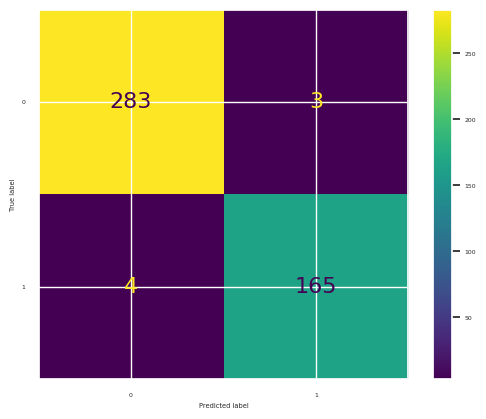

In [ ]:
grid_search_lr_base.fit(X_train, y_train)

show_accuracy(grid_search_lr_base, X_train, y_train)

#### PCA Data

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99        71
        True       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



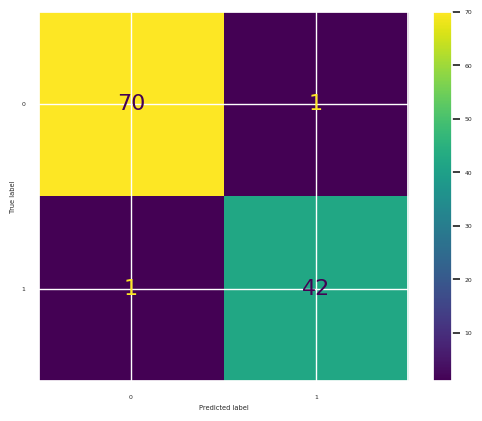

In [ ]:
grid_search_lr_pca.fit(X_train_pca, y_train_pca)

show_accuracy(grid_search_lr_pca, X_test_pca, y_test_pca)

#### L1 Data

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Accuracy: 0.9560439560439561
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.97      0.97       286
        True       0.95      0.93      0.94       169

    accuracy                           0.96       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



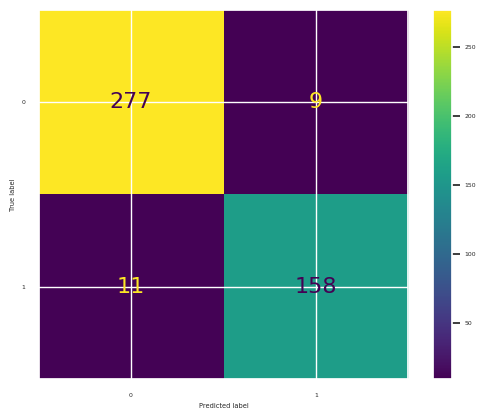

In [ ]:
grid_search_lr_l1.fit(X_train_l1, y_train_l1)

show_accuracy(grid_search_lr_l1, X_train_l1, y_train_l1)

#### L2 Data

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Accuracy: 0.9846153846153847
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99       286
        True       0.99      0.97      0.98       169

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



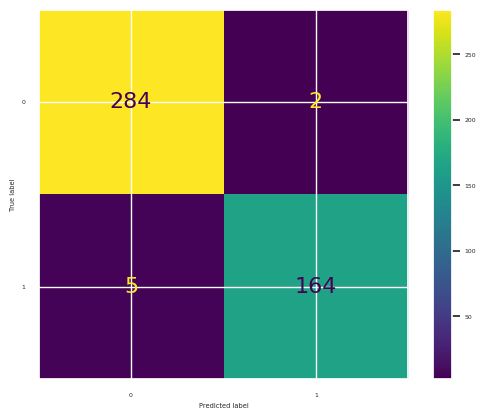

In [ ]:
grid_search_lr_l2.fit(X_train_l2, y_train_l2)

show_accuracy(grid_search_lr_l2, X_train_l2, y_train_l2)

In [ ]:
print("Base Data lr grid search best:", grid_search_lr_base.best_params_, end="\n\n")
print("PCA Data lr grid search best:", grid_search_lr_pca.best_params_, end = "\n\n")
print("L1 Data lr grid search best:", grid_search_lr_l1.best_params_, end="\n\n")
print("L2 Data lr grid search best:", grid_search_lr_l2.best_params_, end = "\n\n")

Base Data lr grid search best: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

PCA Data lr grid search best: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

L1 Data lr grid search best: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

L2 Data lr grid search best: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}



Grid Search for the logistic regression model with the base, PCA, and L2 data increased the accuracy but it decreased for L1 data.

# Test the model

Test the best performing model on the unlabelled dataset

In [ ]:
import pandas as pd

df_wbcd = pd.read_csv("/content/WBCD2.csv")

df_wbcd.head()

FileNotFoundError: ignored

In [ ]:
wbcd_id = df_wbcd["id"]
wbcd_id

In [ ]:
wbcd_data = df_wbcd.drop(columns=["id"])
wbcd_data.head()

In [ ]:
wbcd_input = wbcd_data.values
wbcd_input[:5]

In [ ]:
wbcd_preds = grid_search_rf_base.predict(wbcd_input)
wbcd_preds

In [ ]:
np.sum(wbcd_preds==True)

In [ ]:
np.sum(wbcd_preds==False)

In [ ]:
wbcd_preds_lf = grid_search_lr_base.predict(wbcd_input)
wbcd_preds_lf

In [ ]:
np.sum(wbcd_preds_lf==True)

In [ ]:
np.sum(wbcd_preds_lf==False)

In [ ]:
wbcd_preds_rf = rf.predict(wbcd_input)
wbcd_preds_rf

In [ ]:
np.sum(wbcd_preds_rf==True)

In [ ]:
np.sum(wbcd_preds_rf==False)

In [ ]:
from collections import Counter

def most_common_boolean(*args):
    counts = Counter(args)
    return counts.most_common(1)[0][0]

def getMostHypedValue(*args):
  newArr = []
  for i in range(len(args[0])):
    newArr.append(most_common_boolean(*[j[i] for j in args]))

  return np.array(newArr)


In [ ]:
total_preds = getMostHypedValue(wbcd_preds, wbcd_preds_lf, wbcd_preds_rf)
total_preds

In [ ]:
print(np.sum(total_preds==False))
print(np.sum(total_preds==True))

In [ ]:
wbcd_id.head()

In [ ]:
def bornana(v):
  return "M" if v else "B"

toSaveDict = {"Id": wbcd_id, "Diagnosis": np.array(list(map(bornana, total_preds)))}
df = pd.DataFrame(data=toSaveDict)
df.to_csv('output.csv', index=False)

The outputted result file will have the predictions of three models combined.